In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Local\Temp\ipykernel_4568\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Зависимость времени создания стека от его размера

Построим графики, которые показывают разницу во времени создания стека от его размера для двух различных реализаций: на массиве и на списке. Замеры проводились на достаточном производительом ноутбуку Asus Rog Zephyrus G14 на базе процессора AMD RYZEN 7 5800HS. 

In [2]:
PATH_TO_DATA = "../prj.data/stack"

In [3]:
data_stack_array = pd.read_csv(f"{PATH_TO_DATA}/stack_arr_time.txt")
data_stack_list = pd.read_csv(f"{PATH_TO_DATA}/stack_lst_time.txt")
data_stack_array.sample(10)

,n,time
3812,3812,44875
104015,104015,513545
72552,72552,406141
26099,26099,150757
70106,70106,430117
69690,69690,401864
101359,101359,487175
18395,18395,95341
4146,4146,58411
25495,25495,114357


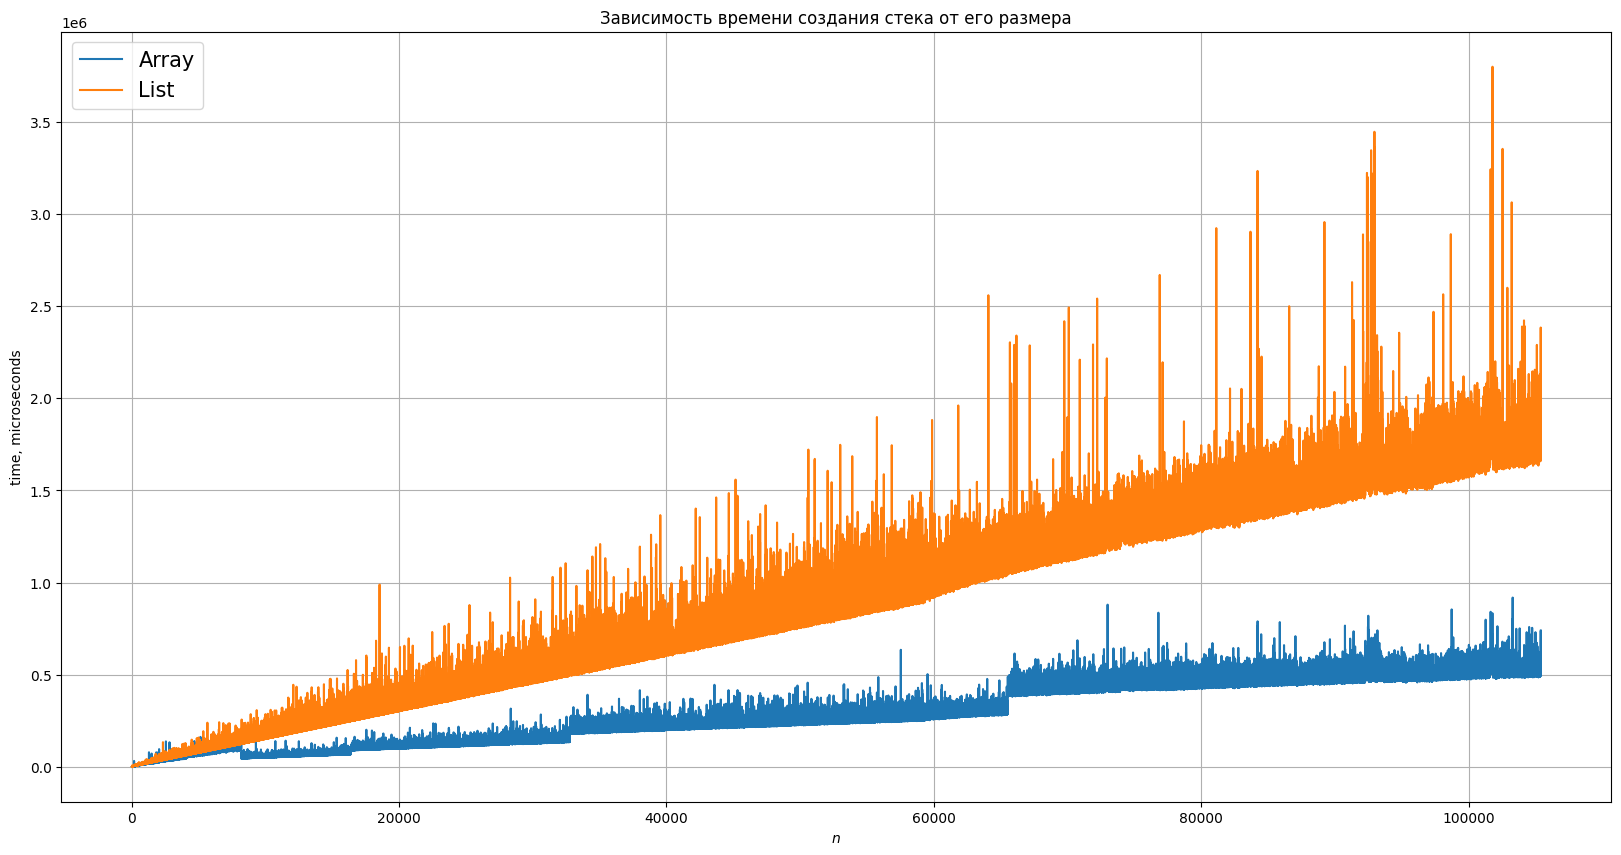

In [4]:
plt.figure(figsize=(20,10))
plt.title("Зависимость времени создания стека от его размера")
plt.rcParams.update({'font.size': 15})
plt.xlabel(fr"$n$")
plt.ylabel("time, microseconds")
plt.grid()
plt.plot(data_stack_array["n"], data_stack_array["time"], label="Array")
plt.plot(data_stack_list["n"], data_stack_list["time"], label="List")
plt.legend()
plt.show()

**Выводы:** Из графиков мы видим, что стек на массиве показывает себя значительно лучше при больших значения $n$, что достаточно логично, ведь именно в реализации на массиве эффективно используется кеш-память и запись нового элемента занимает значительно меньше времени, чем при аллоцировании новой памяти на куче. Однако на графике стека на массиве мы также видим характерные скачки, которые говорят о том, что происходит расширение массива. 

# Зависимость среднего времени push от количества вставок

Изучим время работы для одного push для каждой из реализаций.

In [9]:
N = 1e5
data_stack_array_push = pd.read_csv(f"{PATH_TO_DATA}/stack_arr_push.txt")
data_stack_list_push = pd.read_csv(f"{PATH_TO_DATA}/stack_lst_push.txt")
data_stack_array_push.sample(10)

,n,time
76995,76996,20
88278,88279,20
88109,88110,30
98751,98752,20
50539,50540,30
12653,12654,20
5780,5781,20
45291,45292,20
68729,68730,31
56075,56076,30


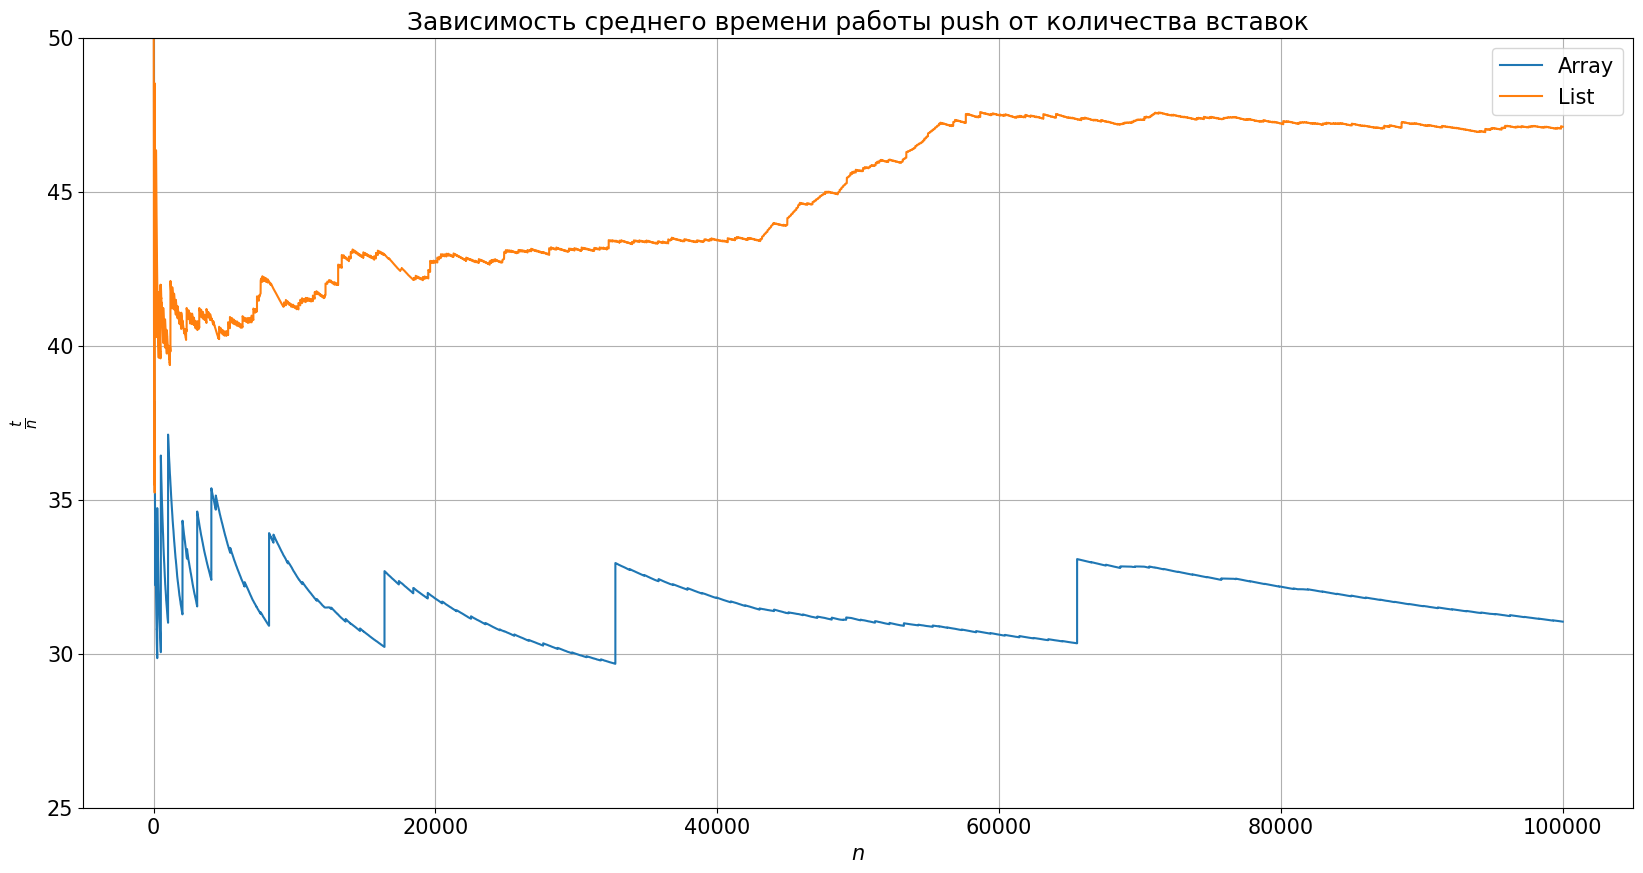

In [12]:
plt.figure(figsize=(20,10))
plt.title("Зависимость среднего времени работы push от количества вставок")
plt.rcParams.update({'font.size': 15})
plt.xlabel(fr"$n$")
plt.ylabel(r"$\frac{t}{n}$")
plt.grid()
plt.plot(data_stack_array_push["n"], np.cumsum(data_stack_array_push["time"]) / np.arange(1, N + 1), label="Array")
plt.plot(data_stack_list_push["n"], np.cumsum(data_stack_list_push["time"]) / np.arange(1, N + 1), label="List")
plt.ylim(25, 50)
plt.legend()
plt.show()

**Выводы:** Из графиков видно, что среднее время работы вставки в list-реализации работает дольше, чтотак же логично, ведь выделение памяти в произвольном месте в кучи работает дольше. А на array-реализации мы видим множественные скачки, которые показывают аллокацию новой памяти.  